# 因子投资中的机器学习—— Chapter 4 惩罚性线性回归和稀疏对冲最小方差组合

**作者**: 林劲展  
**日期**: 2024-10-02  
**电子邮件**: jinzl@stu.pku.edu.cn  
**电话号码**: +86 13026888733  
**单位**: 北京大学汇丰商学院  
**专业方向**: 数量金融

---

## 项目简介
<p><span style="font-size: 18px;">
这一部分主要是线性模型正则化。包括模型的两种应用方式：一是借助惩罚项提高因子预测性回归的稳健性，再根据预测结果进行资产配置；二是将最优均值-方差投资组合的权重与特定截面回归结合起来，提高权重质量。

### 一、惩罚性线性回归
<p><span style="font-size: 18px;">
1、简单线性回归：即给定预测变量矩阵X，试图把输出向量y分解为Xβ加上误差项ε的线性函数：

$$y=X\beta+\epsilon$$

<p><span style="font-size: 18px;">要做的是最小化误差平方和，损失即为：

$$L=\epsilon'\epsilon=\sum\epsilon_i^2$$

<p><span style="font-size: 18px;">为了找到最优的β，一阶导数条件：

$$\nabla_{\beta}L=\frac{\partial}{\partial \beta}(y-X\beta)'(y-X\beta)=2X'X\beta-2X'y=0$$

<p><span style="font-size: 18px;">标准普通OLS解即为：

$$\beta=(X'X)^{-1}X'y$$

<p><span style="font-size: 18px;">设矩阵X的维数为I×K，只有I严格优于K时，X'X才能被转置。如果预测变量比观测值多，这就可能不成立，此时，β不唯一。如果X'X非奇异或正定时，二姐条件可以保证β产生在全局最小化的损失函数L。对上述变量的标准假设一般为：
<p><span style="font-size: 18px;">回归函数的线性形式
$$E[y|X]=X\beta$$
    
<p><span style="font-size: 18px;">误差与预测变量无关
$$E[\epsilon|X]=0$$

<p><span style="font-size: 18px;">误差间不相关但方差相同
$$E[\epsilon\epsilon'|X]=\sigma^2I$$

<p><span style="font-size: 18px;">误差符合正态分布
$$\epsilon_i-N(0,\sigma)$$

<p><span style="font-size: 18px;">在这些假设下，对回归系数$\hat{β}$可以进行统计检验。

<p><span style="font-size: 18px;">
2、惩罚项的形式

<p><span style="font-size: 18px;">LASSO模型：
    
$$y_i=\sum_{j=1}^{J}\beta_jx_{i,j}+\epsilon_i,i=1,...,I,s.t.\sum_{j=1}^J|\beta_j|<\delta$$

<p><span style="font-size: 18px;">求最小化的误差相当于对拉格朗日公式求解：

$$\min_\beta({{\sum_{i=1}^{I}(y_i-\sum_{j=1}^{J}\beta_jx_{i,j})^2+\lambda\sum_{j=1}^{J}|\beta_j|}})$$

<p><span style="font-size: 18px;">其中λ>0，具体数值取决于δ，δ越小，λ越大，给系数的约束越大。与岭回归（$L^2$正则化）相似：

$$\min_\beta({{\sum_{i=1}^{I}(y_i-\sum_{j=1}^{J}\beta_jx_{i,j})^2+\lambda\sum_{j=1}^{J}\beta_j^2}})$$

<p><span style="font-size: 18px;">但是机制上有所不同：随着惩罚程度加大，或随δ的减小，岭回归的系数缓慢向0收敛；在LASSO回归中，收敛更加迅速。在LASSO模型中，只有一个系数会保持不为0，而在零回归中，所有系数只会渐进收敛到0。

<p><span style="font-size: 18px;">考虑K=2个预测变量的情形，最佳的无约束解$\beta^*$在空间中以红色显示，不满足约束条件。约束条件内以灰色显示。在LASSO回归下，$|\beta_1|+|\beta_2|<\delta$，在岭回归中，$\beta_1^2+\beta_2^2<\delta$为满足约束条件，需要在允许更大误差水平前提下，在$\beta^*$附近找最优解$\hat{\beta}$，误差水平以虚线显示。如下图：

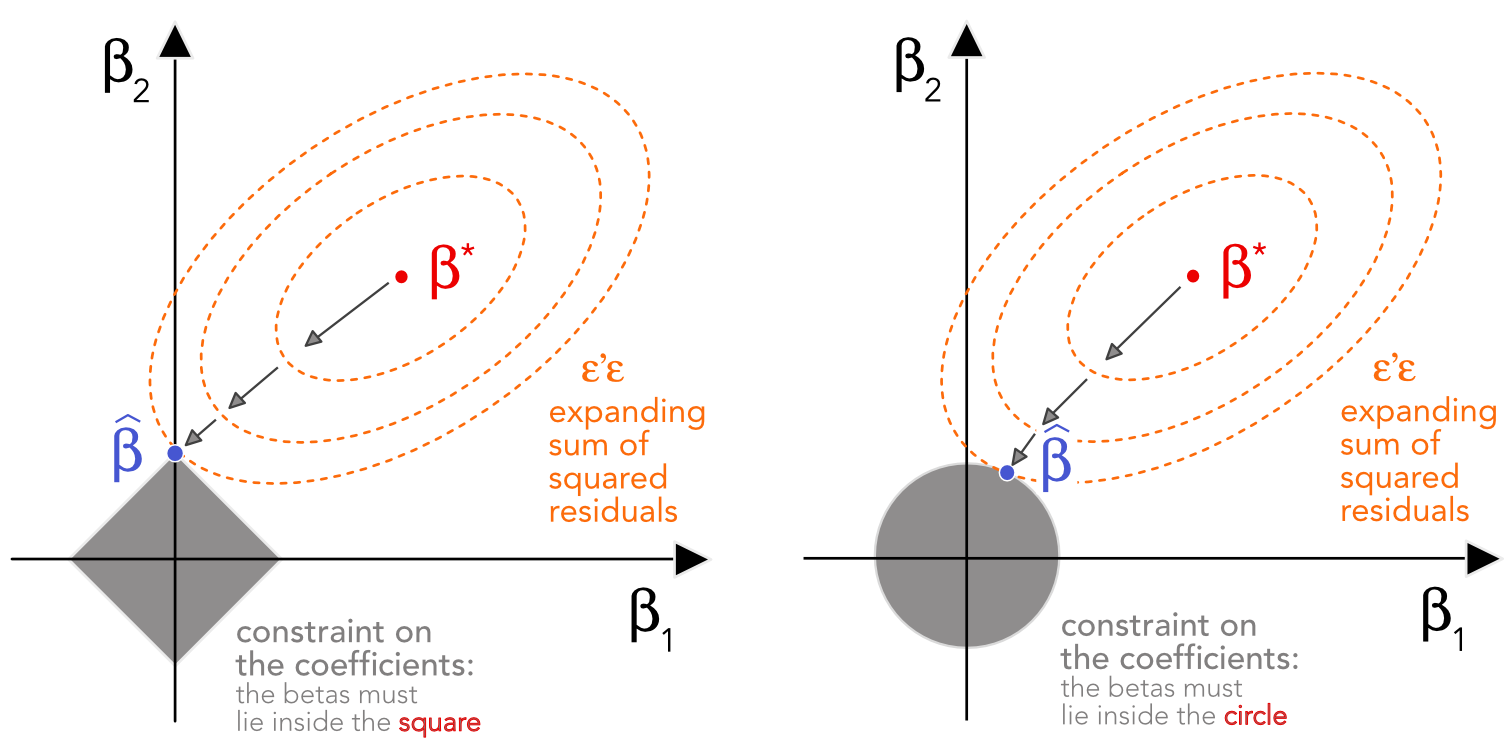

<p><span style="font-size: 18px;">当外生变量数目超过观测值的数目时，即经典回归无唯一解，LASSO和岭回归都能起作用。零回归中OLS估计量变为：

$$\hat{\beta}=(X'X+\lambda I_N)^{-1}X'y$$

<p><span style="font-size: 18px;">额外的项$\lambda I_N$保证了λ>0时，矩阵可逆。

<p><span style="font-size: 18px;">也有学者提出，两种方法的结合可以获益,即弹性网络：

$$y_i=\sum_{j=1}^{J}\beta_jx_{i,j}+\epsilon_i,i=1,...,I,s.t.\alpha\sum_{j=1}^J|\beta_j|+(1-\alpha)\sum_{j=1}^{J}\beta_j^2<\delta$$

$$\min_\beta({{\sum_{i=1}^{I}(y_i-\sum_{j=1}^{J}\beta_jx_{i,j})^2+\lambda(\alpha\sum_{j=1}^{J}|\beta_j|+(1-\alpha)\sum_{j=1}^{J}\beta_j^2       )}})$$

<p><span style="font-size: 18px;">与岭回归相比，LASSO回归优势在于其选择能力，LASSO模型会逐步排除最不相关的变量，弹性网络保留了这种选择能力。α越接近于0，收敛越平滑。

<p><span style="font-size: 18px;">
3、示例

<p><span style="font-size: 18px;">LASSO模型：

In [8]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import pandas as pd # 加载数据
import numpy as np
data_ml=pd.read_csv('data_ml.csv' ) # 导入数据
features=['Ebit_Oa', 'Ebit_Ta', 'Eps', 'Fcf_Bv','Interest_Expense', 'Mkt_Cap_3M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd', 'Net_Margin', 
          'Pb', 'Pe', 'Recurring_Earning_Total_Assets','Total_Debt_Capital','Total_Liabilities_Total_Assets','Vol1Y_Usd', 'Vol3Y_Usd']
y_penalized = data_ml['R1M_Usd'].values # Dependent variable
X_penalized = data_ml[features].values # Predictors
alphas = np.arange(1e-4,1.0e-3,1e-5) # here alpha is used for lambda in scikit-learn
lasso_res = {} # declaring the dict that will receive the model's result 

<p><span style="font-size: 18px;">下图可见LASSO模型的系数β随惩罚强度λ增加的变化情况。可以注意到Mkt_Cap_3M_Usd的负系数代表的规模异象。

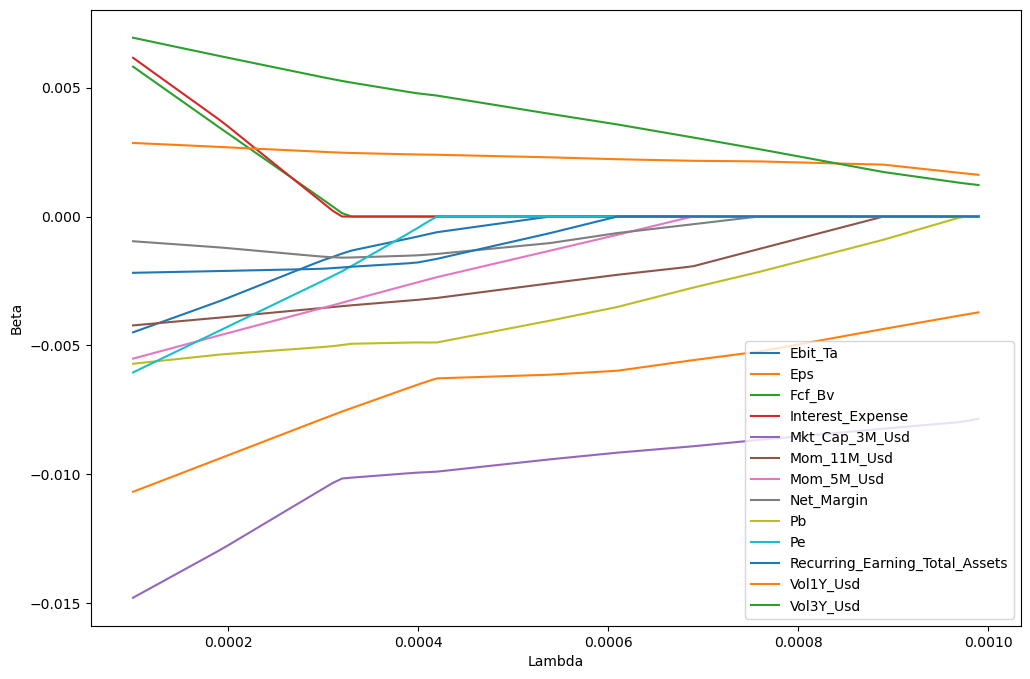

In [9]:
for alpha in alphas: # looping through the different alphas/lambdas values
  lasso = Lasso(alpha=alpha) # model
  lasso.fit(X_penalized,y_penalized) 
  lasso_res[alpha] = lasso.coef_ # extract LASSO coefs

df_lasso_res = pd.DataFrame.from_dict(lasso_res).T # transpose the dataframe for plotting
df_lasso_res.columns = features # adding the names of the factors
predictors = (df_lasso_res.abs().sum() > 0.05) # selecting the most relevant
df_lasso_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(12,8)); # Plot!

<p><span style="font-size: 18px;">岭回归下，可见系数的收敛过程更加平滑。

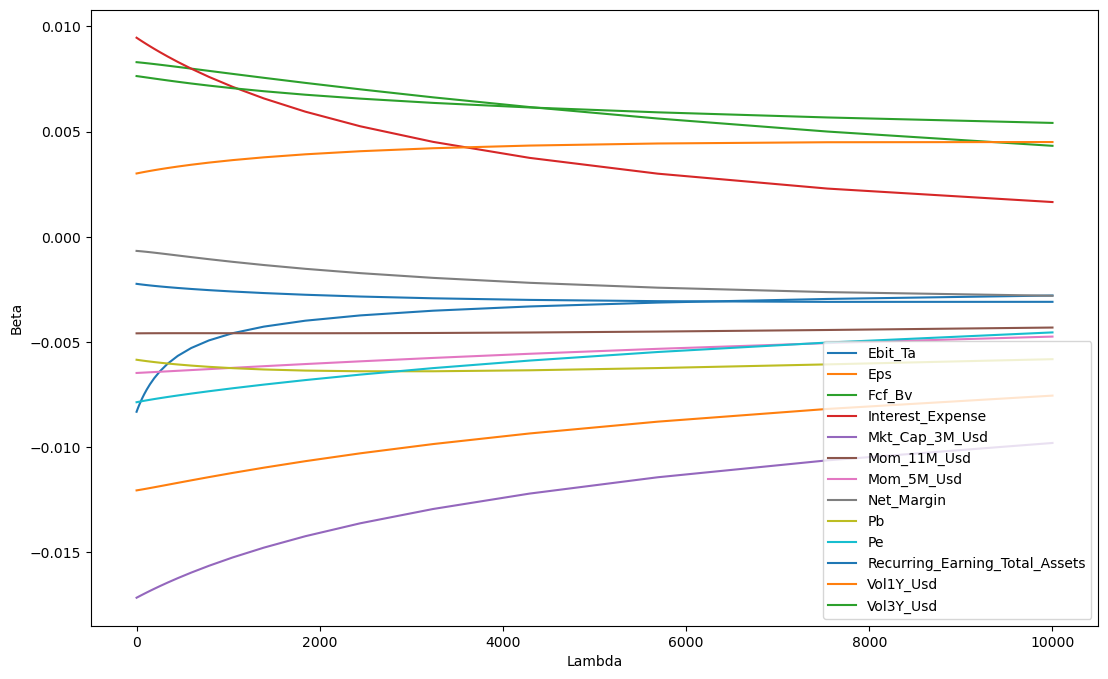

In [10]:
n_alphas = 50 # declare the number of alphas for ridge
alphas = np.logspace(-2, 4, n_alphas) # transforming into log for Aspect ratio 
ridge_res = {} # declaring the dict that will receive the model's result 

for alpha in alphas: # looping through the different alphas/lambdas values
  ridge = Ridge(alpha=alpha) # model
  ridge.fit(X_penalized,y_penalized) # fit the model
  ridge_res[alpha] = ridge.coef_ # extract RIDGE coefs

df_ridge_res = pd.DataFrame.from_dict(ridge_res).T # transpose the dataframe for plotting
df_ridge_res.columns = features # adding the names of the factors
df_ridge_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(13,8)); # Plot!

<p><span style="font-size: 18px;">二、稀疏对冲最小方差组合

<p><span style="font-size: 18px;">1、简介与推导

<p><span style="font-size: 18px;">通常的均值-方差配置中，一个核心输入是资产协方差矩阵的逆矩阵$\Sigma^{-1}$，最大夏普比率的投资组合为：

$$\omega^{MSR}=\frac{\Sigma^{-1\mu}}{1'\Sigma^{1-\mu}}$$

<p><span style="font-size: 18px;">其中μ是预期超额收益向量，在预期收益一阶矩未知时，取μ=1，得到最小方差投资组合。传统的做法是估计矩阵并取逆来得到MSR的权重。对矩阵进行分解，每次对一个资产进行分析，估计逆矩阵的一行：

$$
\Sigma=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

<p><span style="font-size: 18px;">经典的分割理论表明：

$$
\Sigma^{-1}=\begin{bmatrix}
(\sigma^2-c'C^{-1}C)^{-1} & (\sigma^2-c'C^{-1}C)^{-1}c'C^{-1} \\
-(\sigma^2-c'C^{-1}C)^{-1}C^{-1}c & C^{-1}+(\sigma^2-c'C^{-1}C)^{-1}C^{-1}cc'C^{-1}
\end{bmatrix}
$$

<p><span style="font-size: 18px;">C是第2到第N个资产的协方差矩阵，c是第一个资产与其他资产的协方差。显然逆矩阵的第一行为：

$$(\sigma^2-c'C^{-1}C)^{-1}[1 ,-c'C^{-1}]$$

<p><span style="font-size: 18px;">现在考虑另一种形式。若将第一个资产收益对其他资产的收益进行回归：

$$r_{1,t}=a_1+\sum_{n=2}^{N}\beta_{1/n}r_{n,t}+\epsilon_t, i.e.,r_1=a_11_T+R_{-1}\beta_1+\epsilon_1$$

<p><span style="font-size: 18px;">$R_{-1}$是除了第一个资产外其他所有资产的收益率。$\beta_1$的OLS估计量为：

$$\hat{\beta}=C^{-1}c$$

<p><span style="font-size: 18px;">源于Frisch-Waugh-Lovell定理的分割形式。此外：

$$(l-R^2)\sigma_{r_1}^2=\sigma_{r_1}^2-c'C^{-1}c=\sigma_{\epsilon_1}^2$$

<p><span style="font-size: 18px;">证明此处略去。综上可得，$\Sigma^{-1}$的第一行为：

$$\frac{1}{\sigma_{\epsilon_1}^2}×[1,-\hat{\beta_1}']$$

<p><span style="font-size: 18px;">只要得到了第一行，将其×μ就可以得到资产1在投资组合的权重。上述推理对任何一行都适用。若不考虑缩放系数，每持有1单位头寸的资产1，就要持有$-\hat{\beta_1}$头寸的其他资产。缩放系数则象征着对该投资组合的信心。

<p><span style="font-size: 18px;">稀疏对冲投资组合策略的伪编码如下。在每个日期，对于所有资产i，在t=1,...,T样本上弹性网络回归，得到$\Sigma^{-1}$的第n行：

$$[\hat{\Sigma}^{-1}]_i=argmin_{\beta_{i|}}(\sum_{t=1}^{T}(r_{i,t}-a_i+\sum_{n≠i}^{N}\beta_{i|n}r_{n,t})^2+\lambda\alpha|\beta_{i|}|_1+\lambda(1-\alpha)|\beta|_2^2)$$

<p><span style="font-size: 18px;">为了获得资产i的权重，计算出基于μ加权的权重和：

$$w_i=\sigma_{\epsilon_i}^{-2}(\mu_i-\sum_{j≠i}\beta_{i|j}\mu_j)$$

<p><span style="font-size: 18px;">其中向量$\beta_{i|}$是其他资产对资产i收益回归的系数。

<p><span style="font-size: 18px;">相对于原始模型，引入了惩罚项。引入约束产生的权重更加稳健，受到μ估计误差的影响更小；由于稀疏性，权重更稳定，杠杆更小，受交易成本影响更小。

<p><span style="font-size: 18px;">2、案例

<p><span style="font-size: 18px;">由于收益向量μ通常包含大量噪声，一个简单的解决方案是采用不可知的观点μ=1.稀疏对冲投资组合只基于收益，因此构建收益率变量。

In [13]:
stock_ids_short=[]   # creating empty placeholder for temporary dataframe
stock_days=[]        # creating empty placeholder for temporary dataframe
stock_ids=data_ml['stock_id'].unique() # A list of all stock_ids
stock_days=data_ml[['date','stock_id']].groupby(['stock_id']).count().reset_index() # compute the number of data points per stock
stock_ids_short=stock_days.loc[stock_days['date'] == (stock_days['date'].max())] # Stocks with full data
stock_ids_short=stock_ids_short['stock_id'].unique() ### in order to get a list 
is_stock_ids_short=data_ml['stock_id'].isin(stock_ids_short)  
returns=data_ml[is_stock_ids_short].pivot(index='date',columns='stock_id',values='R1M_Usd') # compute returns in matrix format

In [18]:
# Convert the index to datetime format with the correct format
returns.index = pd.to_datetime(returns.index, format='%Y-%m-%d')


In [37]:


# 选择分割日期，取样本外
t_oos = returns.index[returns.index > pd.Timestamp('2005-01-01')].values

# Proceed with your code
Tt = len(t_oos)  # Nb of dates
nb_port = 3      # Nb of portfolios/strats

port_weights = {} # Initial portf. weights in dict
port_returns = {} # Initial portf. returns in dict

In [38]:
def weights_sparsehedge(returns, alpha, Lambda):
  weights = [] # Initiate weights in list
  lr = ElasticNet(alpha=alpha,l1_ratio=Lambda) # ?? elasticnet
  for col in returns.columns: # Loop on the assets
    y = returns[col].values # Dependent variable
    X = returns.drop(col, axis=1).values # Independent variable
    lr.fit(X,y)
    err = y - lr.predict(X) # Prediction errors
    w = (1-np.sum(lr.coef_))/np.var(err) # Output: weight of asset i
    weights.append(w)
  return weights / np.sum(weights) # Normalisation of weights

In [39]:
def weights_multi(returns, j, alpha, Lambda):
  N = returns.shape[1]
  if j == 0: # j = 0 => EW
    return np.repeat(1/N,N) 
  elif j == 1: # j = 1 => Minimum Variance
    sigma = np.cov(returns.T) + 1e-2 * np.identity(N) # Covariance matrix + regularizing term
    w = np.matmul(np.linalg.inv(sigma),np.repeat(1,N)) # Multiply & inverse
    return w / np.sum(w) # Normalize
  elif j == 2: # j = 2 => Penalised / elasticnet
    return weights_sparsehedge(returns, alpha, Lambda)

<p><span style="font-size: 18px;">以下对比三种策略：（1）等权基准（EW）（2）经典的全局最小方差(MV)（3）稀疏对冲最小方差组合（Sparse）

In [40]:
for m, month in np.ndenumerate(t_oos): # Loop = rebal. dates
  temp_data = returns.loc[returns.index < month] # Data for weights
  realised_returns = returns.loc[returns.index == month].values # OOS returns
  weights_temp = {} 
  returns_temp = {}

  for j in range(nb_port): # Loop over strats
    wgts = weights_multi(temp_data, j, 0.1, 0.1) # Hard-coded params!
    rets = np.sum(wgts * realised_returns) # Portf. returns
    weights_temp[j] = wgts
    returns_temp[j] = rets
    
  port_weights[month] = weights_temp # not used but created
  port_returns[month] = returns_temp
  
port_returns_final = pd.concat(
        {k: pd.DataFrame.from_dict(v, 'index') for k, v in port_returns.items()}, 
        axis=0).reset_index() # Dict comprehension approach -- https://www.python.org/dev/peps/pep-0274/

colnames = ['date','strategy','return'] # Colnames
port_returns_final.columns = colnames # Colnames
strategies_name = {0:'EW',1:'MV',2:'Sparse'}
port_returns_final['strategy'] = port_returns_final['strategy'].replace(strategies_name)
pd.DataFrame(port_returns_final.groupby('strategy')['return'].std()).T # Portfolio volatilities (monthly scale)

strategy,EW,MV,Sparse
return,0.056786,0.039266,0.051526


<p><span style="font-size: 18px;">稀疏对冲的目的是更好地估计资产的协方差矩阵，以便对最小方差组合权重估计更加准确。即使观测值数量与资产数量相比很小，惩罚性方法也表现良好。

<p><span style="font-size: 18px;">3、预测性回归

<p><span style="font-size: 18px;">使用线性关系并增加惩罚项：

$$r_{t+1,n}=\alpha_n+\sum_{k=1}^{K}\beta_{n}^kf_{t,n}^k+\epsilon_{t+1,n}, s.t.\alpha\sum_{j=1}^J|\beta_j|+(1-\alpha)\sum_{j=1}^{J}\beta_j^2<\theta$$

<p><span style="font-size: 18px;">$\theta$是惩罚强度。正则化的目的是为产生更稳健的估计，未来收益相对可靠估计为：

$$\hat{r_{t+1,n}}=\hat{\alpha_n}+\sum_{k=1}^{K}\hat{\beta_{n}^k}f_{t,n}^k$$

In [47]:
from sklearn.model_selection import train_test_split
y=data_ml['R1M_Usd']
X=data_ml[features]
X_penalized_train, X_penalized_test, y_penalized_train, y_penalized_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#y_penalized_train = training_sample['R1M_Usd'].values # Dependent variable
#X_penalized_train = training_sample[features].values # Predictors
model = ElasticNet(alpha=0.1, l1_ratio=0.1) # model
fir_pen_pred=model.fit(X_penalized_train,y_penalized_train) # fitting the model
#y_penalized_test = testing_sample['R1M_Usd'].values # Dependent variable
#X_penalized_test = testing_sample[features].values # Predictors
mse = np.mean((fir_pen_pred.predict(X_penalized_test) - y_penalized_test)**2)
print(f'MSE: {mse}')
hitratio = np.mean(fir_pen_pred.predict(X_penalized_test) * y_penalized_test > 0)
print(f'Hit Ratio: {hitratio}')

MSE: 0.025905087925916625
Hit Ratio: 0.5513974168960406


<p><span style="font-size: 18px;">ke'jia